# Context
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

##Content

* ID - Unique ID
* Gender - Gender of the customer
* Ever_Married - Marital status of the customer
* Age - Age of the customer
* Graduated - Is the customer a graduate?
* Profession - Profession of the customer
* Work_Experience - Work Experience in years
* Spending_Score - Spending score of the customer
* Family_Size - Number of family members for the customer (including the customer)
* Var_1 - Anonymised Category for the customer
* Segmentation - (target) Customer Segment of the customer

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from plotly.offline import init_notebook_mode,iplot

Mounted at /content/gdrive


In [2]:

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Customer_Segmentation/Train.csv')


In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
#dropping ID column
df=df.drop(columns=['ID'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [6]:
print("Number of data points in train data", df.shape)
print('-'*50)
print("The attributes of data :", df.columns.values)

Number of data points in train data (8068, 10)
--------------------------------------------------
The attributes of data : ['Gender' 'Ever_Married' 'Age' 'Graduated' 'Profession' 'Work_Experience'
 'Spending_Score' 'Family_Size' 'Var_1' 'Segmentation']


In [7]:
# checking null values
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [8]:
# Removing all those rows that have 3 or more missing values
df = df.loc[df.isnull().sum(axis=1)<3]
df.shape

(8049, 10)

In [9]:
print('The count of each Segment\n',df.Segmentation.value_counts())

The count of each Segment
 D    2261
C    1968
A    1965
B    1855
Name: Segmentation, dtype: int64


In [10]:
print('The count of each Category \n',df.Var_1.value_counts())

The count of each Category 
 Cat_6    5232
Cat_4    1084
Cat_3     820
Cat_2     422
Cat_7     201
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [11]:
# checking null values in category
df.Var_1.isnull().sum()

72

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



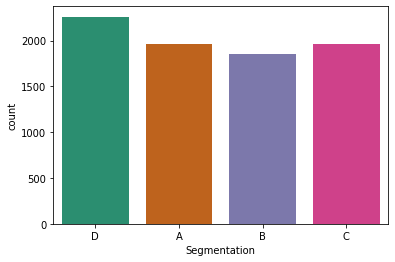

In [12]:
sns.countplot(df.Segmentation,palette='Dark2')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



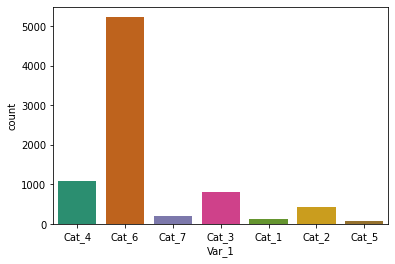

In [13]:
sns.countplot(df.Var_1,palette='Dark2')

In [14]:
print('The count of each Category \n',df.Profession.value_counts())

The count of each Category 
 Artist           2515
Healthcare       1331
Entertainment     949
Engineer          699
Doctor            688
Lawyer            619
Executive         598
Marketing         291
Homemaker         246
Name: Profession, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



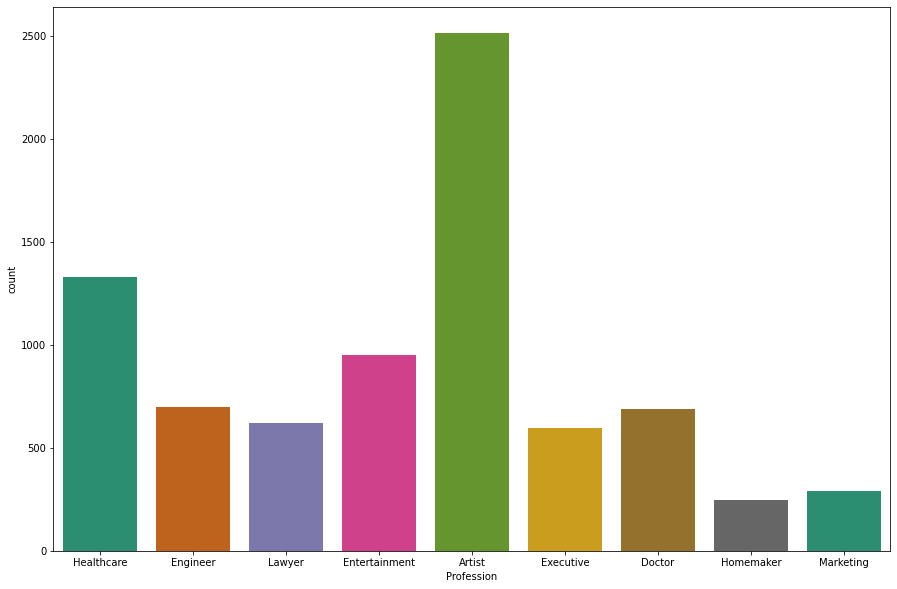

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(df.Profession,palette='Dark2')

In [16]:
ax1 = df.groupby(["Segmentation"])["Var_1"].value_counts().unstack().round(3)
ax1

Var_1,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
Segmentation,,,,,,,
A,31,83,223,332,19,1210,49
B,26,106,186,231,20,1231,43
C,26,99,153,109,18,1496,47
D,50,134,258,412,28,1295,62


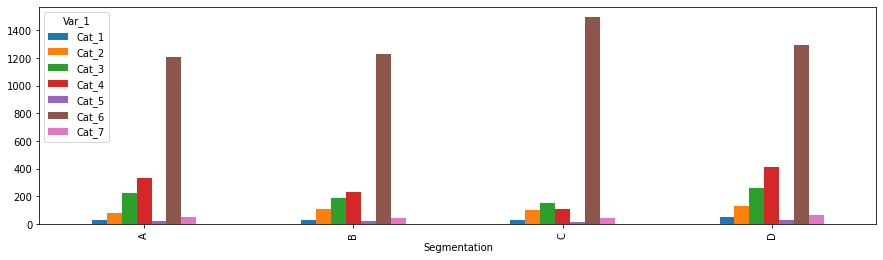

In [17]:
ax1.plot(kind="bar",figsize = (15,4))

In [19]:
ax2 = df.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)
ax2

Gender,Female,Male
Segmentation,,
A,905,1060
B,859,996
C,921,1047
D,955,1306


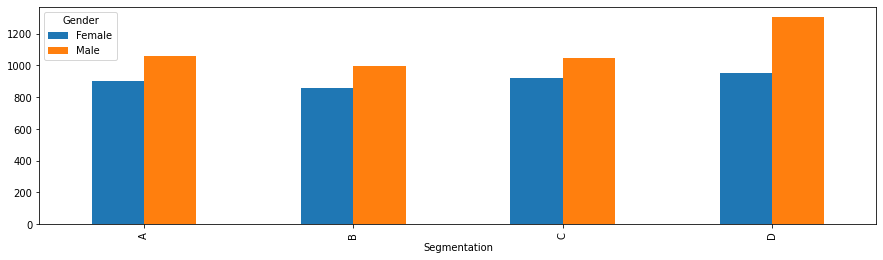

In [20]:
ax2.plot(kind="bar",figsize = (15,4))

In [23]:
mk = LabelEncoder()
df['Gender'] = mk.fit_transform(df['Gender'])
df['Ever_Married'] = mk.fit_transform(df['Ever_Married'])
df['Graduated'] = mk.fit_transform(df['Graduated'])
df['Spending_Score'] = mk.fit_transform(df['Spending_Score'])
df['Var_1'] = mk.fit_transform(df['Var_1'])
df['Profession'] = mk.fit_transform(df['Profession'])
df['Family_Size'] = mk.fit_transform(df['Family_Size'])
df['Work_Experience'] = mk.fit_transform(df['Work_Experience'])
df['Segmentation'] = mk.fit_transform(df['Segmentation'])

In [24]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,3,3,3
1,0,1,38,1,2,15,0,2,3,0
2,0,1,67,1,2,1,2,0,5,1
3,1,1,67,1,7,0,1,1,5,1
4,0,1,40,1,3,15,1,5,5,0


## Predicting Segmentation

In [25]:
from sklearn.model_selection import train_test_split

features = df.drop(columns=['Segmentation'],axis=1)
target = df['Segmentation']
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)

## Supervised ML

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [27]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'XGBClassifier': XGBClassifier()}

In [28]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores,index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    
    
    return model_scores

In [29]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

In [30]:
cm = sns.color_palette('PuBuGn',as_cmap=True)
score = model_scores.style.background_gradient(cmap=cm)
score

,Score
DecisionTreeClassifier,0.429193
KNeighborsClassifier,0.468944
LogisticRegression,0.479503
SVC,0.484472
RandomForestClassifier,0.503106
AdaBoostClassifier,0.531056
XGBClassifier,0.531056
GradientBoostingClassifier,0.537888


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                      param_distributions=params[name],
                                      cv=5,
                                      n_iter=20,n_jobs=-1,
                                      verbose=2)        
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        
    return model_rs_scores, model_rs_best_param


In [32]:
models = {'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier()
         }

params = {'AdaBoostClassifier': {'n_estimators': [20,50,100,200,400],
                                'learning_rate': [0.001,0.01,0.1,1.0],
                                'algorithm': ['SAMME','SAMME.R']},
          'GradientBoostingClassifier' : {'loss': ['deviance', 'exponential'],
                                          'learning_rate': [0.001,0.01,0.1,1.0],
                                          'n_estimators': [20,50,100,200,400],
                                          'criterion': ['friedman_mse', 'mse'],
                                          'max_depth' : [2,3,6,10,20],
                                          'ccp_alpha' : [0.0,0.001,0.01,0.1,1]
                                          }
         }

In [33]:
model_rs_scores,model_rs_best_param = randomsearch_cv_scores(models,params,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 310, in _check_params
    self.loss_ = loss_class(self.n_classes_)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/e

In [34]:
model_rs_scores = pd.DataFrame(model_rs_scores,index=['Score']).transpose()
model_rs_scores.sort_values('Score')

,Score
GradientBoostingClassifier,0.501863
AdaBoostClassifier,0.519876


In [35]:
model_rs_best_param

{'AdaBoostClassifier': {'algorithm': 'SAMME.R',
  'learning_rate': 0.1,
  'n_estimators': 400},
 'GradientBoostingClassifier': {'ccp_alpha': 0.001,
  'criterion': 'mse',
  'learning_rate': 0.01,
  'loss': 'deviance',
  'max_depth': 2,
  'n_estimators': 200}}

## Model Evaluation

In [36]:
ada = AdaBoostClassifier(n_estimators=400,learning_rate=0.1,algorithm='SAMME.R')
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.51      0.48       375
           1       0.40      0.23      0.29       385
           2       0.51      0.58      0.54       408
           3       0.65      0.72      0.68       442

    accuracy                           0.52      1610
   macro avg       0.50      0.51      0.50      1610
weighted avg       0.51      0.52      0.51      1610



In [38]:
from sklearn.metrics import classification_report,plot_confusion_matrix 
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



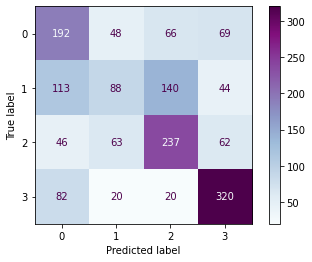

In [39]:
plot_confusion_matrix(ada,X_test,y_test,cmap='BuPu')

In [40]:
cv_accuracy = cross_val_score(ada,X_train,y_train,cv=5,scoring='accuracy')

In [41]:
print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')

Cross Validaion accuracy Scores: [0.52096273 0.50698758 0.53649068 0.50388199 0.4965035 ]
Cross Validation accuracy Mean Score: 0.5129652955739913


## Feature Importance

In [42]:
feat_importance = ada.feature_importances_
feat_importance = pd.DataFrame(feat_importance,
                               columns=['Score'],
                               index=features.columns)

In [43]:
feat_importance.sort_values(by='Score',ascending=False).style.background_gradient(cmap=cm)

,Score
Profession,0.315000
Age,0.180000
Family_Size,0.150000
Var_1,0.132500
Spending_Score,0.055000
Graduated,0.050000
Gender,0.042500
Work_Experience,0.040000
Ever_Married,0.035000


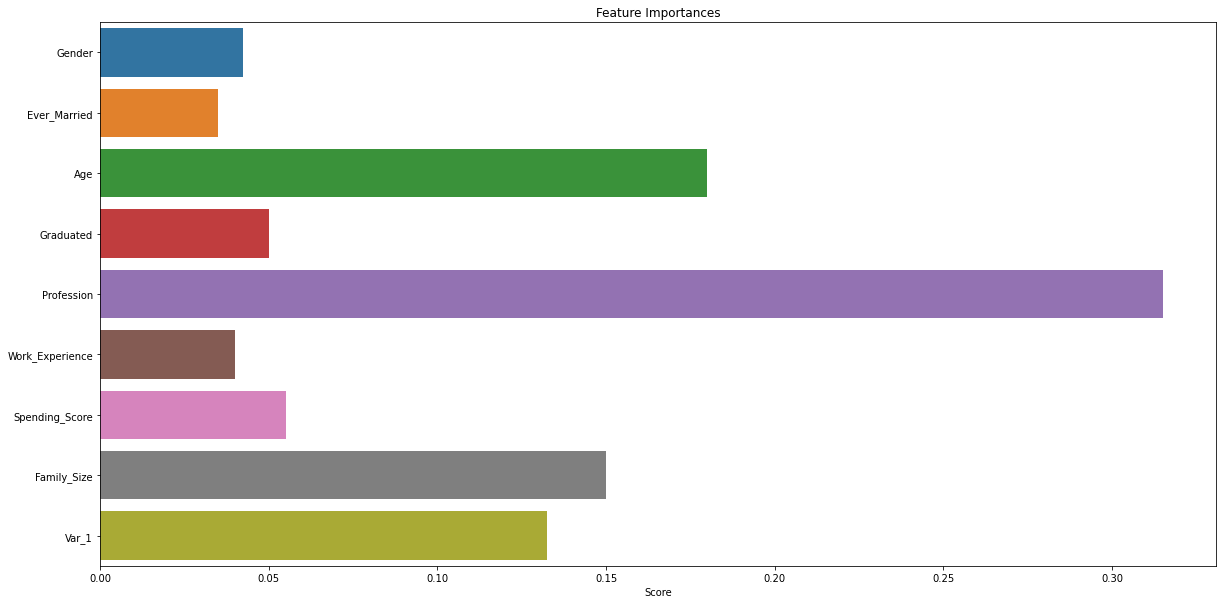

In [44]:
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
sns.barplot(x=feat_importance.Score,y=feat_importance.index)

### With the help of Feature Importance we can conclude that Profession , Age and Family size are a key factor in deciding which Segment does a person belong to.